In [74]:
import kagglehub
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import os
import pandas as pd
!pip install joblib
import joblib
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
path = kagglehub.dataset_download("shanegerami/ai-vs-human-text")

print("Path to dataset files:", path)

100%|██████████| 350M/350M [00:03<00:00, 114MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shanegerami/ai-vs-human-text/versions/1


In [ ]:
list_file=os.listdir(path)
print(f"name of file in the folder :  {list_file}")

name of file in the folder :  ['AI_Human.csv']


In [ ]:
dataframe = pd.read_csv(f"{path}/{list_file[0]}")

In [ ]:
df = dataframe.sample(n=45000, random_state=42)

In [ ]:
df.head()

,text,generated
419952,"Real or Fake Feelings\n\n""Imagine being able t...",0.0
478535,Seeking multiple opinions can help you make be...,0.0
133753,"ADDRESS_NAME\n\nFebruary 9, 2011\n\nDear TEACH...",0.0
68011,"Dear, TEACHER_NAME,\n\nTEACHER_NAME I Believe ...",0.0
195939,Do you believe that there is a computer that c...,0.0


In [ ]:
df.shape

(45000, 2)

In [ ]:
df['generated'].unique()

array([0., 1.])

Dataset consists of 487235 rows and 2 columns namely text and generated.

The column 'text' is the corpus and 'generated' has two values 0 and 1.

Generated by AI : 1 and Human Text: 0

In [ ]:
#Preprocessing
#1. Lowercasing

df['text'] = df['text'].str.lower()

In [ ]:
df['generated'] = df['generated'].astype(int)

In [ ]:
print(string.ascii_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ


In [ ]:
#2. Removing Punctuation
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation))

In [ ]:
#3. Removing Extra Spaces
df['text'] = df['text'].str.strip()
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)

In [ ]:
df['tokens'] = df['text'].apply(word_tokenize)

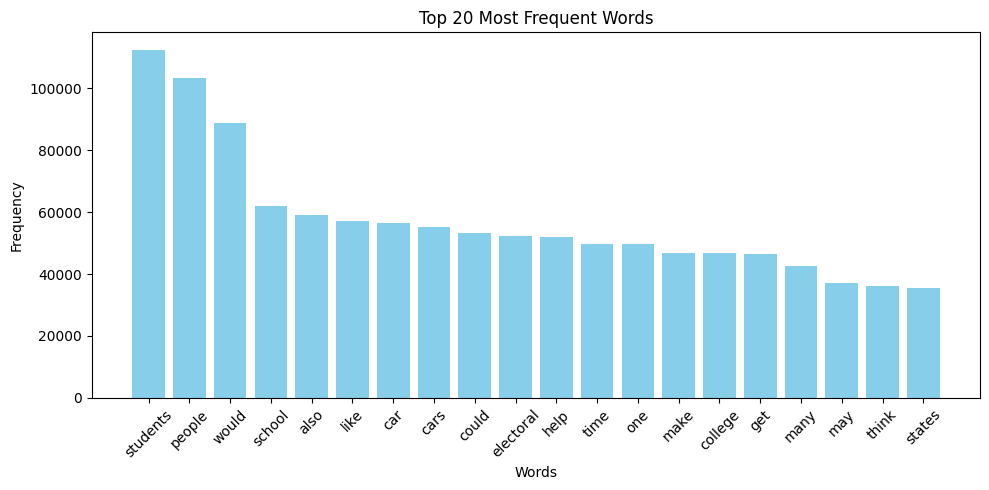

In [ ]:
all_words = [word for tokens in df['tokens'] for word in tokens]

# Step 2: Count word frequencies
word_freq = Counter(all_words)

# Step 3: Get top 20 most common words
common_words = word_freq.most_common(20)

# Step 4: Separate words and counts
words, counts = zip(*common_words)

# Step 5: Plot
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [ ]:
#Stemming
stemmer = PorterStemmer()
df['stemmed_tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [ ]:
#vectorization
df['clean_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df['clean_text'].head()

,clean_text
419952,real fake feeling imagine able detect exactly ...
478535,seeking multiple opinion help make better choi...
133753,addressname february 9 2011 dear teachername t...
68011,dear teachername teachername believe cell phon...
195939,believe computer examine feeling well believe ...


In [77]:
vectorizer = TfidfVectorizer(max_features=5000)

In [78]:
X = vectorizer.fit_transform(df['clean_text'])
y = df['generated']

In [79]:
# 1. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
#1 . L O G I S T I C  R E G R E S S I O N
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))

Logistic Regression Accuracy: 0.9846666666666667


In [81]:
#2. N A I V E  B A Y E S
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))

Naive Bayes Accuracy: 0.9438888888888889


In [82]:
#3. S V M
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

SVM Accuracy: 0.991


In [83]:
print("\n=== Classification Report (Logistic) ===")
print(classification_report(y_test, log_preds))

print("\n=== Classification Report (Naive Bayes) ===")
print(classification_report(y_test, nb_preds))

print("\n=== Classification Report (SVM) ===")
print(classification_report(y_test, svm_preds))



=== Classification Report (Logistic) ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5680
           1       0.99      0.97      0.98      3320

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000


=== Classification Report (Naive Bayes) ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5680
           1       0.95      0.89      0.92      3320

    accuracy                           0.94      9000
   macro avg       0.95      0.93      0.94      9000
weighted avg       0.94      0.94      0.94      9000


=== Classification Report (SVM) ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5680
           1       0.99      0.99      0.99      3320

    accuracy                           0.99      9000
   m

In [84]:
!pip install wordcloud numpy pillow matplotlib
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

book_mask = np.array(Image.open("book_image.jpg"))

text = " ".join(df['text'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    max_words=1000,
    mask=book_mask,
    stopwords=stopwords,
    contour_width=2,
    contour_color='black'
).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyboardInterrupt: 

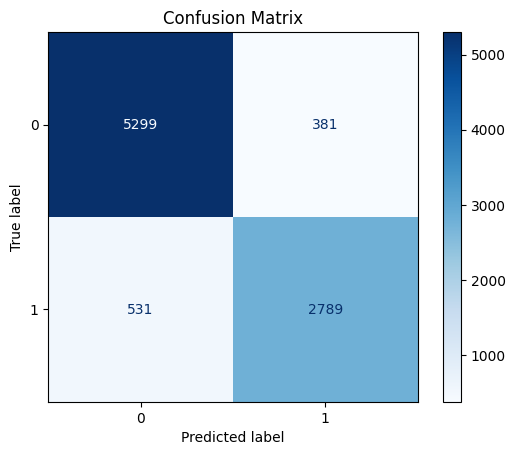

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_test: actual labels
# y_pred: predicted labels (from your model)

cm1 = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [85]:
joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [86]:
from google.colab import files
files.download('logistic_model.pkl')
files.download('naive_bayes_model.pkl')
files.download('svm_model.pkl')
files.download('vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('logistic_model.pkl')

def predict_text():
    user_input = input("Enter a sentence to check if it's AI-generated or Human-written:\n")

    # Preprocessing and vectorizing
    transformed_input = vectorizer.transform([user_input])

    # Predict
    prediction = model.predict(transformed_input)

    # Output
    if prediction[0] == 1:
        print(" This text is likely AI-generated.")
    else:
        print("This text is likely Human-written.")


# Run it
predict_text()

Enter a sentence to check if it's AI-generated or Human-written:
The sky blushed with hues of orange as the sun dipped below the horizon, casting a warm glow over the quiet earth. A single idea can spark a revolution of thought, igniting minds and shifting perspectives in an instant. In every ending lies the seed of a new beginning, patiently waiting for the right moment to bloom.
 This text is likely AI-generated.


In [67]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [75]:
%%writefile app.py
import streamlit as st
import joblib

# Load model and vectorizer
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('logistic_model.pkl')

# Streamlit UI
st.set_page_config(page_title="AI Text Detector", page_icon="🤖", layout="centered")

st.markdown(
    """
    <h2 style='text-align: center; color: #4CAF50;'>🤖 AI vs Human Text Detector</h2>
    <p style='text-align: center;'>Enter a sentence to check if it was written by a human or generated by AI.</p>
    """,
    unsafe_allow_html=True
)

# Input
user_input = st.text_area("Enter your sentence here:", height=150)

# Predict on button click
if st.button("Check"):
    if user_input.strip() == "":
        st.warning("Please enter a sentence before submitting.")
    else:
        transformed_input = vectorizer.transform([user_input])
        prediction = model.predict(transformed_input)

        if prediction[0] == 1:
            st.error("🔍 This text is likely **AI-generated**.")
        else:
            st.success("✅ This text is likely **Human-written**.")


Overwriting app.py


In [69]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 4s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [71]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.245.84.68


In [ ]:
import time as t
!streamlit run /content/app.py &>/content/logs.txt &
t.sleep(3)
!npx localtunnel --port 8501

⠙your url is: https://witty-pugs-cheer.loca.lt
